/home/zhaokanghui/.local/lib/python2.7/site-packages/ipykernel_launcher.py:90: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


('Runtime is \xef\xbc\x9a', 0.7376119999999986)
600


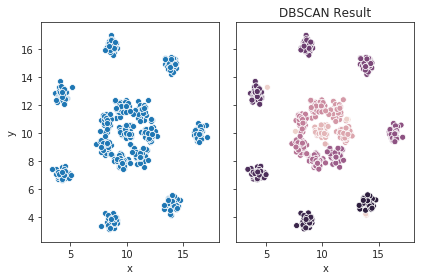

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math

# CLASSIFIED = 1
UNCLASSIFIED = 0
NOISE = -1
TRADITIONAL = "traditional"
ADVANCED = "advanced"

##calculate the neighbours of point p
# def get_neighbours(dataset, pid, eps, num_p, method=TRADITIONAL):
def get_neighbours(pid, eps, method=ADVANCED):
    neighbours = []
    point_array = np.array(dataset)
    if method == TRADITIONAL:
        for nid in range(num_p):
            distance = np.linalg.norm(point_array[pid] - point_array[nid])
            if distance < eps:
                neighbours.append(nid)

    elif method == ADVANCED:
        s = 1.25 * eps * math.sqrt(2)  ##2.5*（1/根号2）
        for nid in range(0, num_p):
            if (dataset[pid][0] - s) <= dataset[nid][0] and dataset[nid][0] <= (dataset[pid][0] + s):
                if (dataset[pid][1] - s) <= dataset[nid][1] and dataset[nid][1] <= (dataset[pid][1] + s):
                    distance = np.linalg.norm(dataset[pid] - dataset[nid])
                else:
                    continue
            else:
                continue
            if distance < eps:
                neighbours.append(nid)
        return neighbours
    return neighbours

# neighbours(0,4)


def cluster(dataset, eps, minpts):
    # data_list = [pid for pid in range(num_p)]
    tag_list = [UNCLASSIFIED] * dataset.shape[0]
    data = []
    noise_list = []
    cluster_id = 1
    count = 0
    for pid in range(num_p):
        data.append(dataset[pid])
        if tag_list[pid] == UNCLASSIFIED:
            neighbour = get_neighbours(pid, eps)
            if len(neighbour) < minpts:
                noise_list.append(pid)
            else:
                tag_list[pid] = cluster_id
                for nid in neighbour:
                    if tag_list[nid] == UNCLASSIFIED:
                        tag_list[nid] = cluster_id

                    if nid in noise_list:
                        noise_list.remove(nid)

                while len(neighbour) > 0:
                    cid = neighbour[0]  # current point id
                    sub_neighbour = get_neighbours(cid, eps)
                    if len(sub_neighbour) >= minpts:
                        for sid in range(len(sub_neighbour)):
                            if sub_neighbour[sid] in noise_list:
                                noise_list.remove(sub_neighbour[sid])
                            if tag_list[sub_neighbour[sid]] == UNCLASSIFIED:
                                neighbour.append(sub_neighbour[sid])
                                tag_list[sub_neighbour[sid]] = cluster_id

                    neighbour = neighbour[1:]
                cluster_id += 1
        # count += 1
        # if count == 4:
        #     break

    for nid in noise_list:
        tag_list[nid] = NOISE

    return tag_list, data

dataset = pd.read_csv('../data/R15.txt', sep='\t', header=None)
dataset.columns = ['x', 'y', 'label']
dataset = dataset[["x", "y"]]
dataset = dataset.as_matrix()

start = time.clock()

end = time.clock()

num_p = dataset.shape[0]
eps = 0.55
min_points = 14
start = time.clock()
result_tags, data = cluster(dataset, eps, min_points)
end = time.clock()
t=end-start
print("Runtime is ：",t)


def plot_result(dataset, result_tags, file_name=None, style='ticks'):
    # data preparation
    dataset = np.array(dataset)
    df = pd.DataFrame()
    df['x'] = dataset[:, 0]
    print(len(df["x"]))
    df['y'] = dataset[:, 1]
    df['label'] = result_tags

    sns.set_style(style)
    f, axes = plt.subplots(1, 2, sharex=True, sharey=True)

    sns.scatterplot('x', 'y', data=df, ax=axes[0], palette='Blues_d')
    sns.scatterplot('x', 'y', data=df, hue='label', ax=axes[1])

    plt.title('DBSCAN Result')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.gca().get_legend().set_visible(False)

    plt.tight_layout()
    plt.show()

plot_result(dataset, result_tags, 'r15')